# Logistic Lasso Regression
This notebook explores Logistic Lasso Regression's interpretability for Heart Disease Prediction.

In [8]:
# Enable autoreload for imports
%load_ext autoreload
%autoreload 2

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from config import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load the datasets
train_data = pd.read_csv(config.datapath / Path("train_data.csv"))
test_data = pd.read_csv(config.datapath / Path("test_data.csv"))

In [3]:
# Establish training and testing sets and target variable
X_train = train_data.drop(columns=["HeartDisease"])
y_train = train_data["HeartDisease"]
X_test = test_data.drop(columns=["HeartDisease"])
y_test = test_data["HeartDisease"]

# Data preprocessing and training of Logistic Lasso Regression

In [25]:
# Get numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# KNN Imputation for missing values
imputer = KNNImputer()
X_train_imp = X_train.copy()
X_test_imp = X_test.copy()
X_train_imp[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test_imp[numerical_cols] = imputer.transform(X_test[numerical_cols])

# Standard scaling
scaler = StandardScaler()
X_train_scaled = X_train_imp.copy()
X_test_scaled = X_test_imp.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_imp[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_imp[numerical_cols])
 
# Train logistic lasso regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Predict and print classification report
y_pred = lasso_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.35      0.46       122
           1       0.32      0.61      0.42        62

    accuracy                           0.44       184
   macro avg       0.48      0.48      0.44       184
weighted avg       0.53      0.44      0.44       184




Top 10 most important features:
              Feature  Importance
5               Sex_F    1.684241
7   ChestPainType_ASY    1.505627
19      ST_Slope_Flat    1.196552
20        ST_Slope_Up    1.101851
17   ExerciseAngina_Y    0.649771
11        FastingBS_0    0.585952
8   ChestPainType_ATA    0.542654
12        FastingBS_1    0.474437
4             Oldpeak    0.438705
0                 Age    0.289176


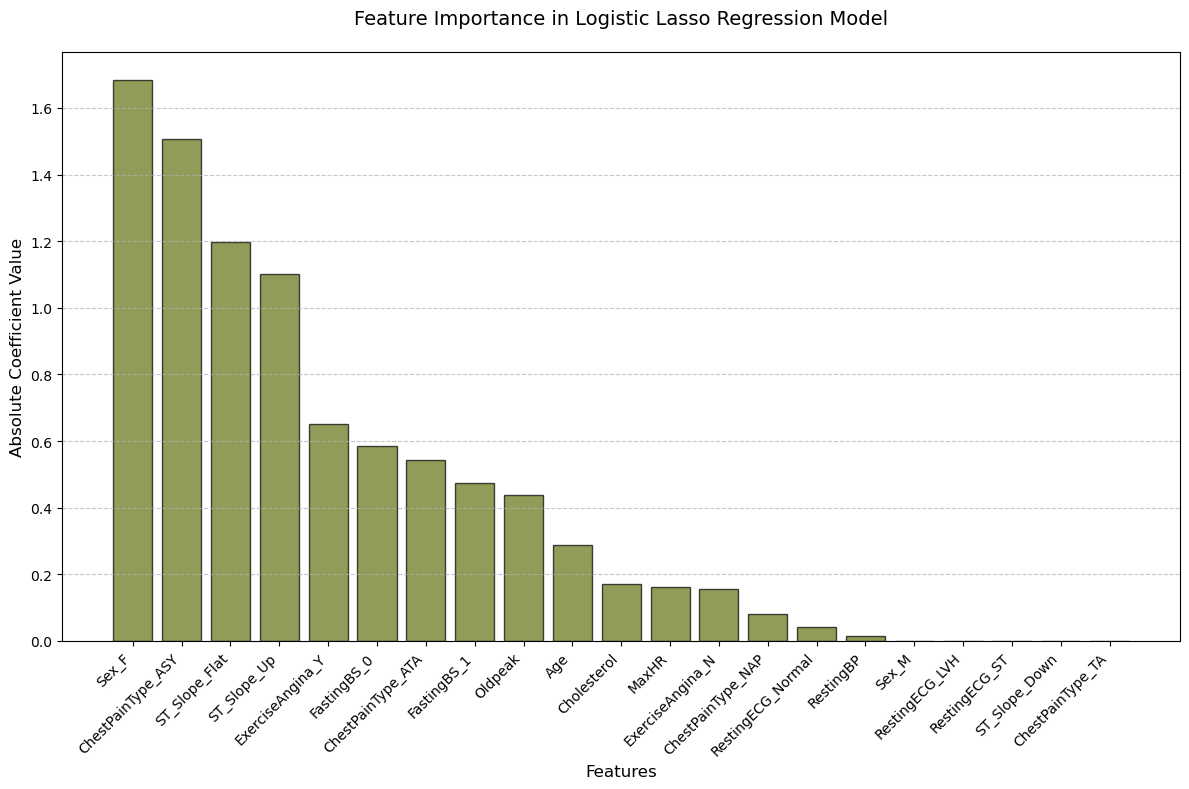

In [27]:
# Get feature importance from lasso model coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': np.abs(lasso_model.coef_[0])
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12,8))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], 
    color='#627313', alpha=0.7, 
    edgecolor='black', linewidth=1)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Logistic Lasso Regression Model', fontsize=14, pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Absolute Coefficient Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Print top 10 most important features
print("\nTop 10 most important features:")
print(feature_importance.head(10))